In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, tests_carried_out, daily_vaccinations, population_vaccinated, unique_people_tested
from heatmap import heatmap
from maps import case_maps
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
23,284 cases (7 day average) as of Sat 16 Apr, -953.7 since Fri 15 Apr
1,507 hospitalised (7 day average) as of Tue 19 Apr, -81.1 since Mon 18 Apr
205 died (7 day average) as of Sat 16 Apr, +23.1 since Fri 15 Apr


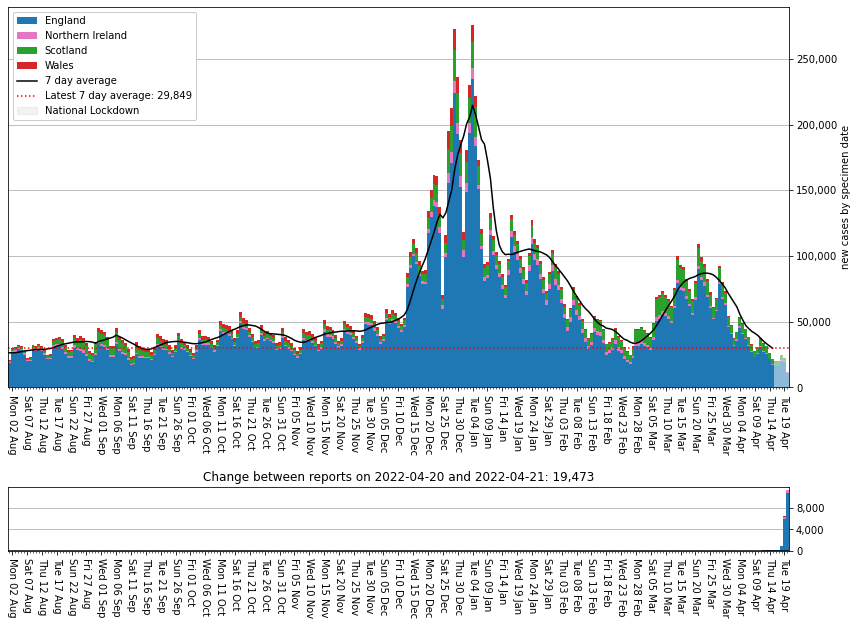

In [3]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b', earliest='2021-08', diff_ylims=None)

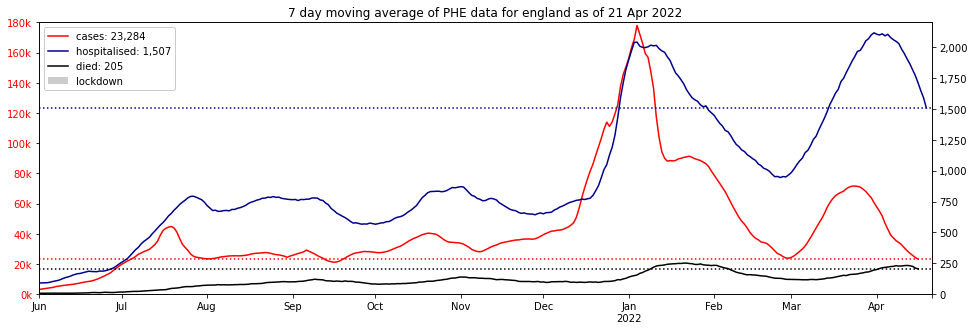

In [4]:
plot_summary(earliest_date='2021-06-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=180_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=2200)

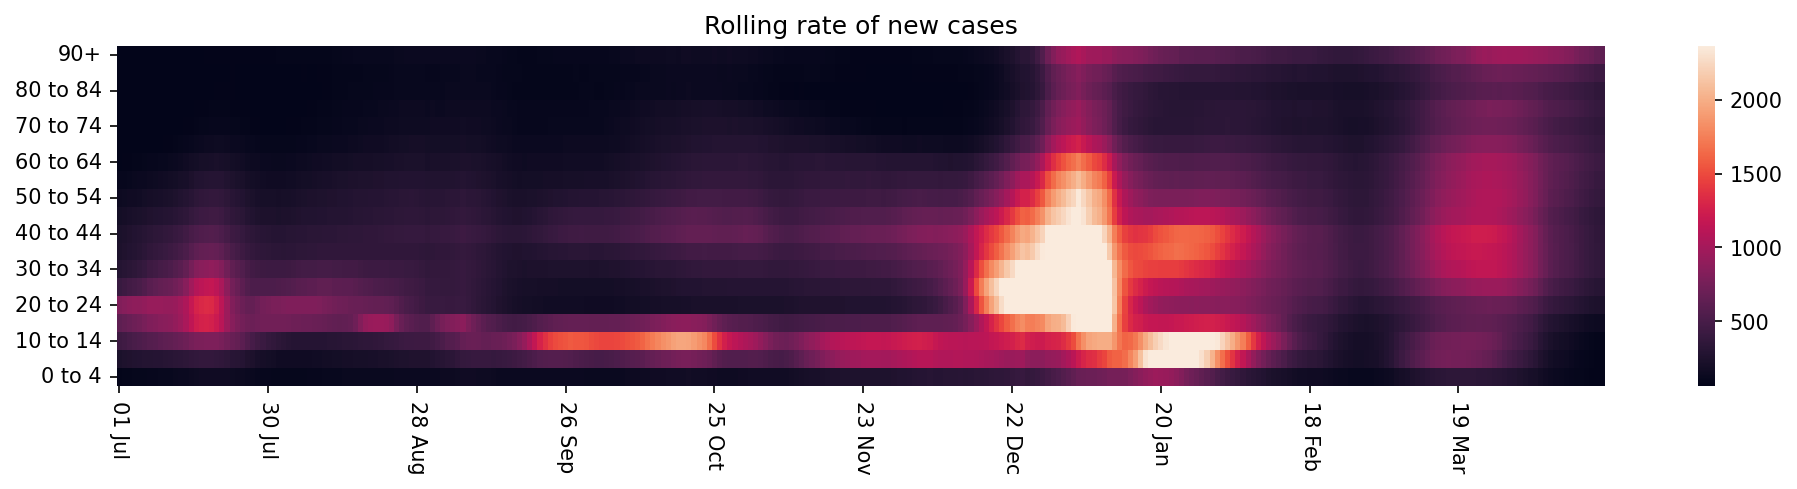

In [5]:
data = load_demographic_data('case_demographics_nation', 'England', 'rollingRate', start='2021-07')[0]
heatmap(data, title='Rolling rate of new cases', figsize=(16, 3))

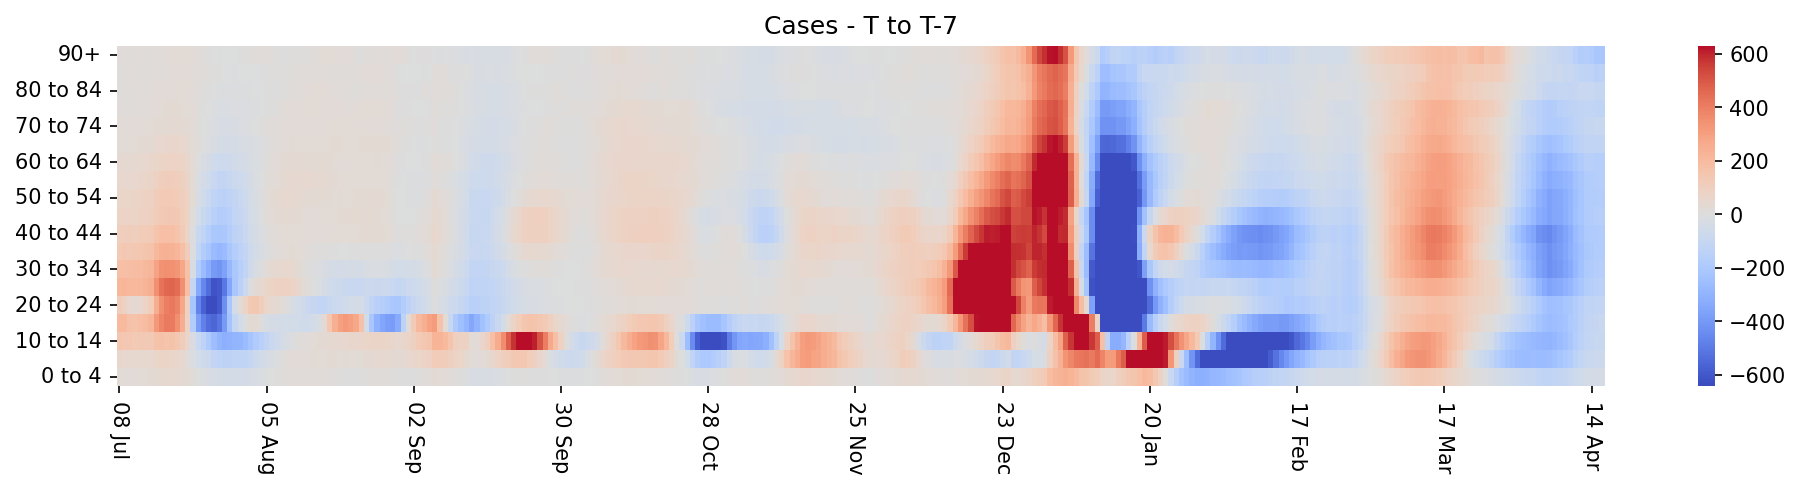

In [6]:
heatmap(diff(data, days=7), title='Cases - T to T-7', figsize=(16, 3), center=0, cmap='coolwarm')

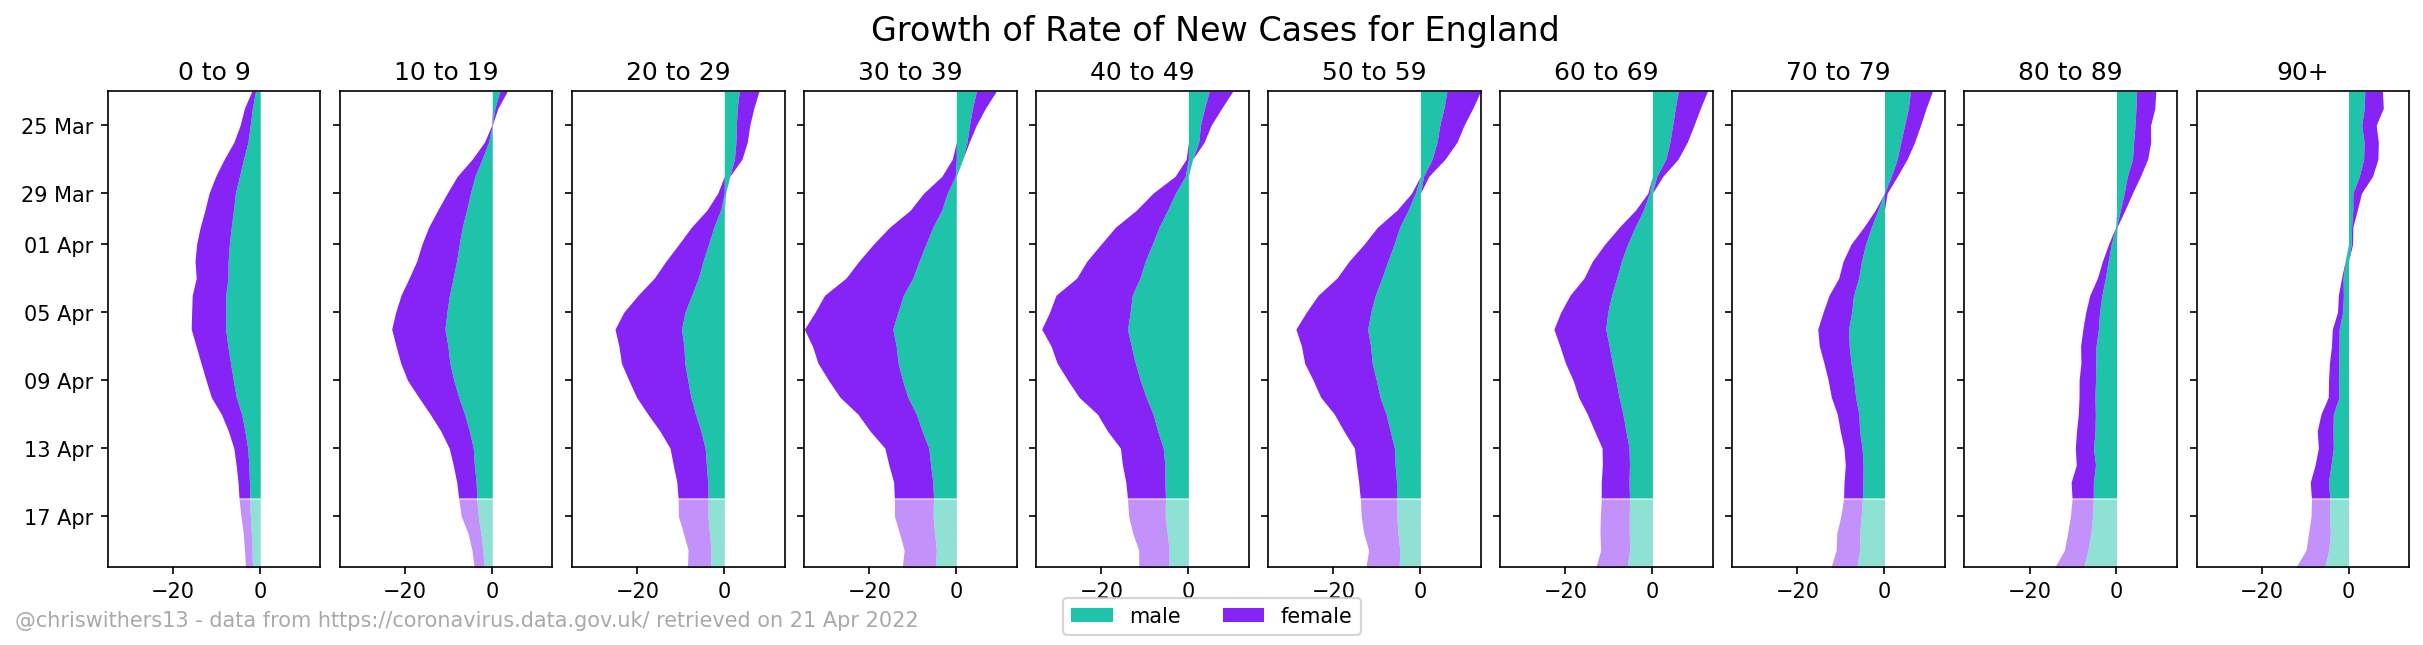

In [7]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

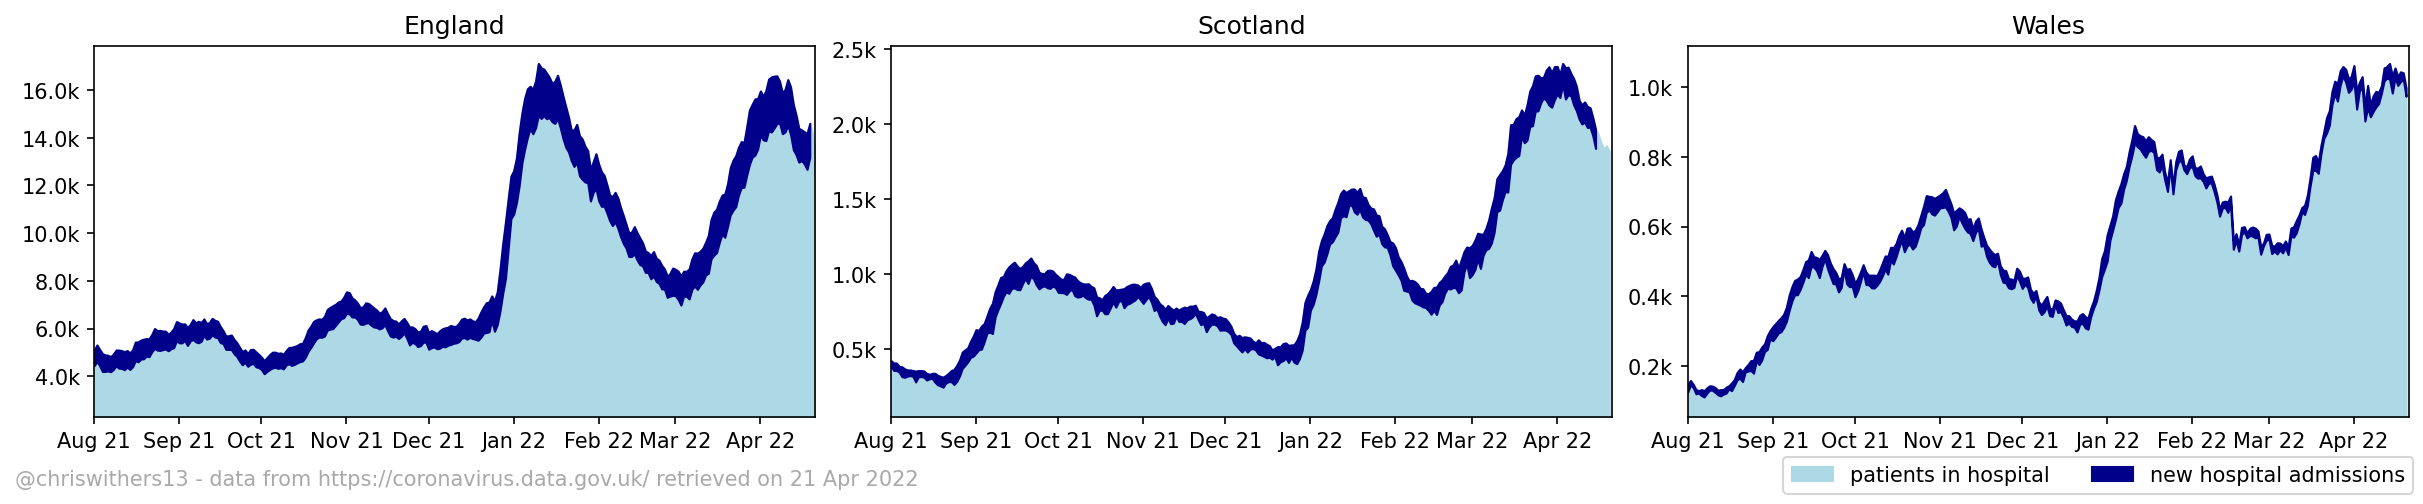

In [8]:
hospital_plot(start='2021-08', figsize=(16,3), figs=(1, 3), ymin=None)

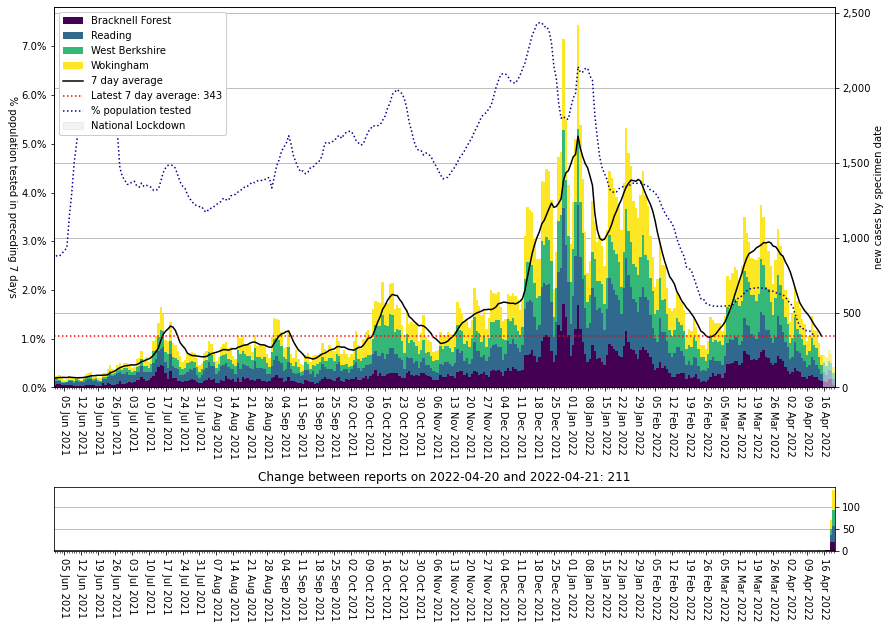

In [9]:
plot_areas(for_date, areas=my_areas, lines=unique_people_tested)

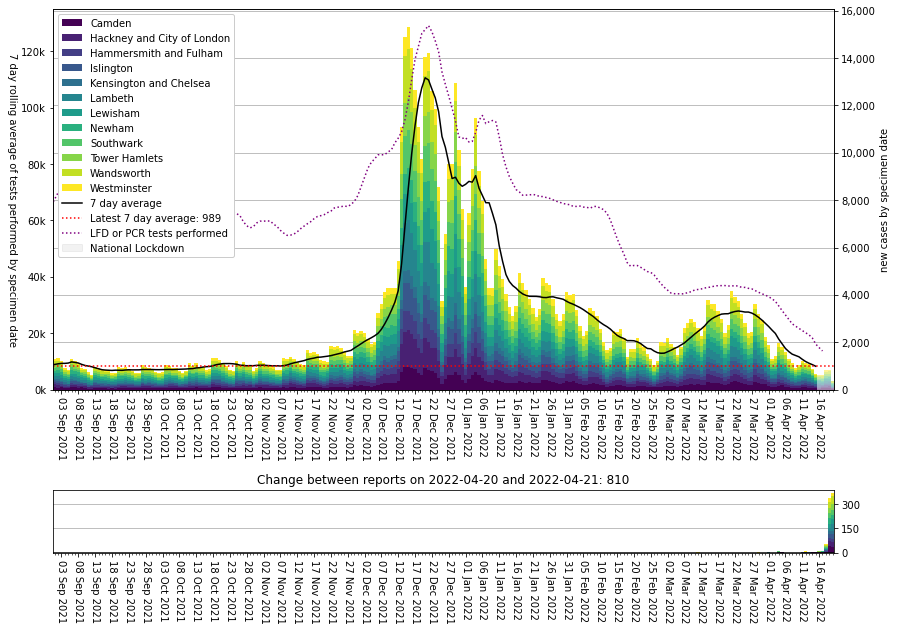

In [10]:
plot_areas(for_date, areas=london_areas, earliest='2021-09', lines=tests_carried_out)

In [11]:
data = recent_cases_summed(days=7, exclude_days=1)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  newCasesBySpecimenDate  \
areaCode                                                                       
S12000013     Na h-Eileanan Siar         1032.934132                   276.0   
S12000027       Shetland Islands          959.860384                   220.0   
S12000047                   Fife          529.781823                  1979.0   
S12000040           West Lothian          519.934462                   952.0   
S12000045    East Dunbartonshire          518.225331                   563.0   
S12000006  Dumfries and Galloway          516.592772                   769.0   
S12000010           East Lothian          516.388085                   553.0   
S12000017               Highland          507.993046                  1198.0   
S12000019             Midlothian          505.083279                   467.0   
S12000014                Falkirk          494.126422                   795.0   

          Specimen date  
areaCode                 
S12000013    2022-04-19  
S12000027    2022-04-19  
S12000047    2022-04-19  
S12000040    2022-04-19  
S12000045    2022-04-19  
S12000006    2022-04-19  
S12000010    2022-04-19  
S12000017    2022-04-19  
S12000019    2022-04-19  
S12000014    2022-04-19

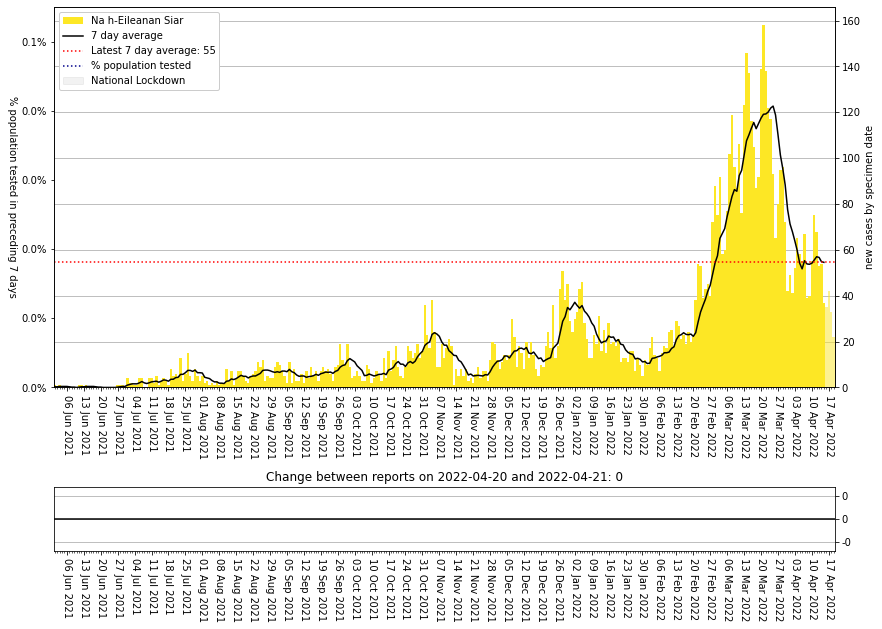

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                      
S12000049                  Glasgow City          416.982563   
S12000036             City of Edinburgh          489.398586   
S12000047                          Fife          529.781823   
E08000035                         Leeds          225.055129   
E06000052  Cornwall and Isles of Scilly          289.086082   
E06000047                 County Durham          303.719718   
E08000025                    Birmingham          140.740715   
E06000054                     Wiltshire          301.785514   
S12000029             South Lanarkshire          464.231117   
S12000050             North Lanarkshire          431.789554   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
S12000049                  2640.0    2022-04-19  
S12000036                  2569.0    2022-04-19  
S12000047                  1979.0    2022-04-19  
E08000035                  1785.0    2022-04-19  
E06000052                  1653.0    2022-04-19  
E06000047                  1610.0    2022-04-19  
E08000025                  1607.0    2022-04-19  
E06000054                  1509.0    2022-04-19  
S12000029                  1488.0    2022-04-19  
S12000050                  1474.0    2022-04-19

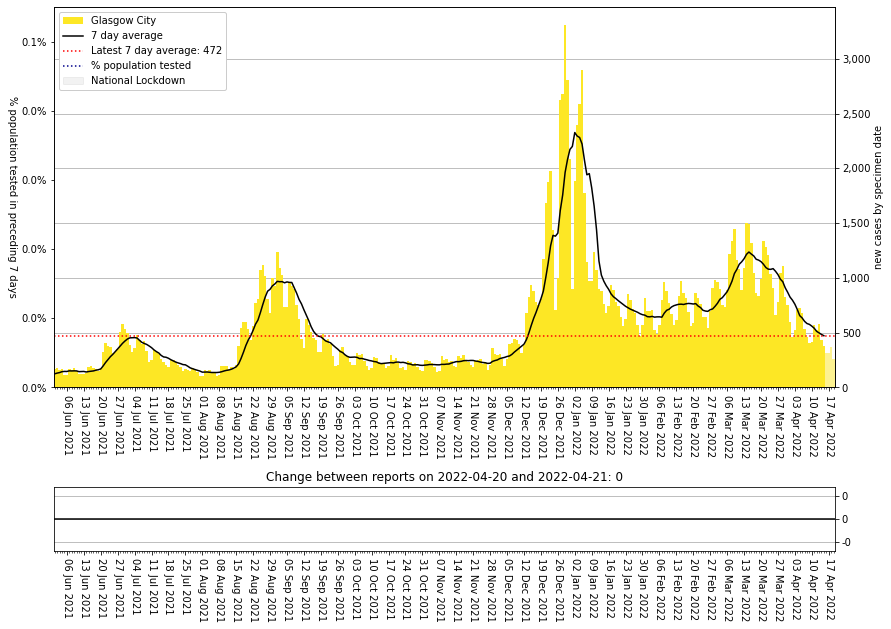

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

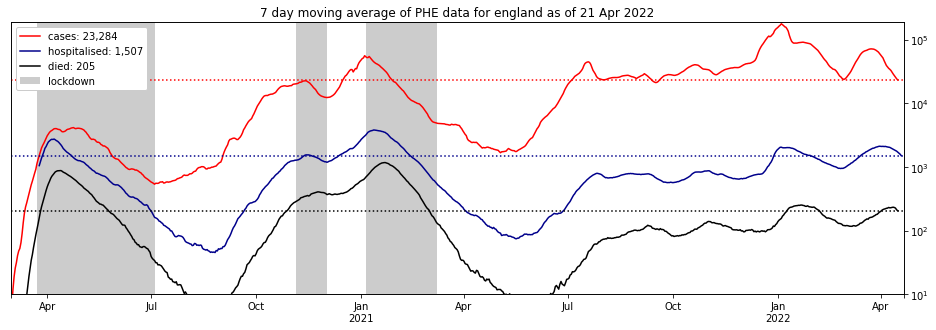

In [16]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

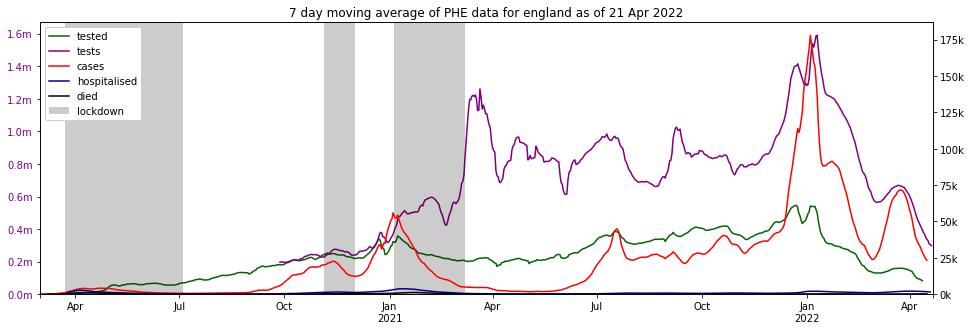

In [17]:
plot_summary(left_series=(s.unique_people_tested_sum, s.reported_virus_tests_sum), left_formatter=per1m_formatter,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

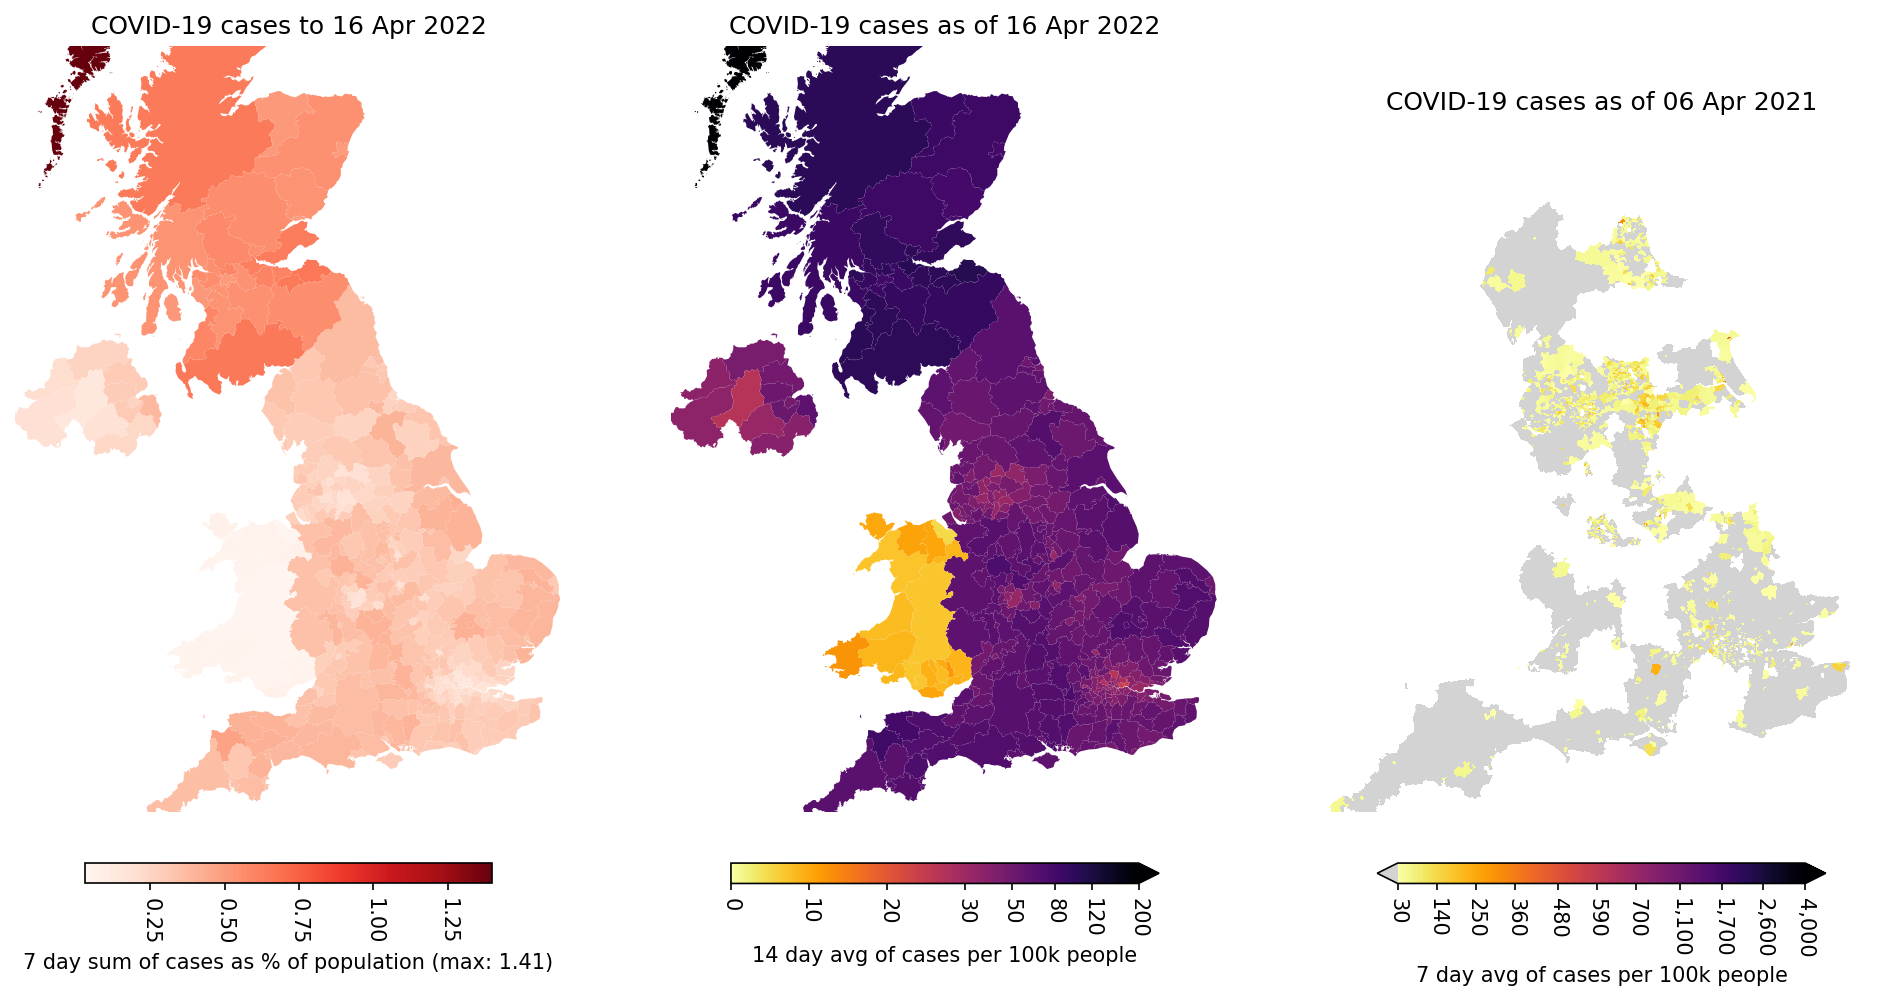

Loading BokehJS ...

In [19]:
case_maps(sum_vmax=1.4, exclude_days=4)